In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

depression = pd.read_csv("adult-depression-lghc-indicator-2.csv")

Просмотр информации о датасете

In [19]:
depression.describe()

,Year,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
count,161.00000,161.000000,1.610000e+02,161.000000,161.000000,161.000000
mean,2015.00000,429.776398,1.026922e+06,14.789627,11.955280,17.624224
std,2.00624,390.297867,9.038811e+05,4.589876,3.705456,5.890040
min,2012.00000,28.000000,9.230900e+04,3.970000,2.000000,5.340000
25%,2013.00000,186.000000,4.700770e+05,11.850000,9.650000,13.870000
50%,2015.00000,314.000000,7.496150e+05,14.520000,11.550000,16.930000
75%,2017.00000,511.000000,1.188297e+06,17.190000,14.600000,20.050000
max,2018.00000,1964.000000,5.302422e+06,33.090000,24.600000,44.950000


In [20]:
depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
Year                  161 non-null int64
Strata                161 non-null object
Strata Name           161 non-null object
Frequency             161 non-null int64
Weighted Frequency    161 non-null int64
Percent               161 non-null float64
Lower 95% CL          161 non-null float64
Upper 95% CL          161 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 10.1+ KB


In [21]:
depression.head()

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,2012,Total,Total,1920,3279772,11.74,11.11,12.37
1,2012,Sex,Male,561,1116664,8.12,7.32,8.92
2,2012,Sex,Female,1359,2163108,15.25,14.30,16.20
3,2012,Race-Ethnicity,White,1314,1806371,14.57,13.67,15.46
4,2012,Race-Ethnicity,Black,97,222022,13.54,10.44,16.65


In [22]:
depression.shape

(161, 8)

Проверка датасета на наличие пустых ячеек

In [23]:
depression.isnull().head(10)

,Year,Strata,Strata Name,Frequency,Weighted Frequency,Percent,Lower 95% CL,Upper 95% CL
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [24]:
depression.isnull().sum()

Year                  0
Strata                0
Strata Name           0
Frequency             0
Weighted Frequency    0
Percent               0
Lower 95% CL          0
Upper 95% CL          0
dtype: int64

В датасете отсутствуют пропуски

Гипотеза 1
Предположим, что в 2012 году чаще диагностировали депрессию, нежели в других годах. 

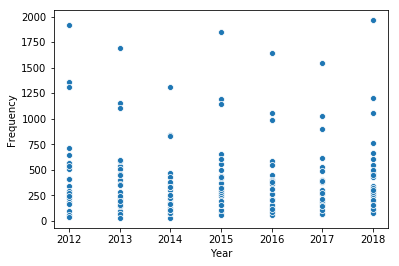

In [25]:
sns.scatterplot(x = depression.Year, y = depression.Frequency)

Гипотеза не верна, так как по построенной диаграмме видно, что больше всего диагностировали депрессию в 2018 году.

Гипотеза 2
Предположим, что в процентном соотношении от общего числа людей с депрессивным расстройством к людям с годовой заработной платой 35000-49999$ в год депрессия встречается чаще нежели других групп.

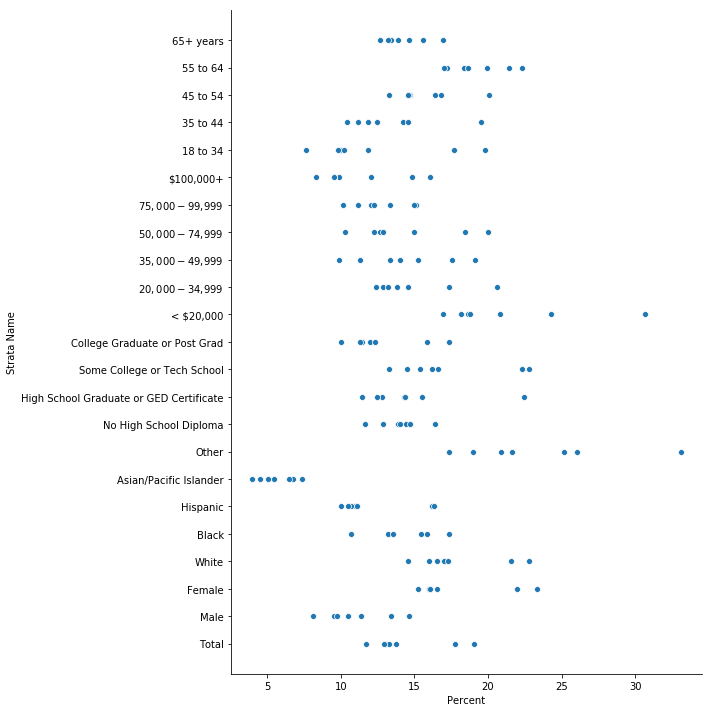

In [26]:
sns.relplot(y = "Strata Name", x = "Percent", data = depression, height = 10)

Гипотеза не верна, так как из графика видно, что депрессия чаще всего встречается среди людей с заработком ниже 20000$ в год.

Гипотеза 3
Предположим, что мы можем сказать с 95% вероятностью, что доля людей в процентном соотношении в возрасте от 55 до 64 имеет наибольший показатель в депрессивных расстройствах.

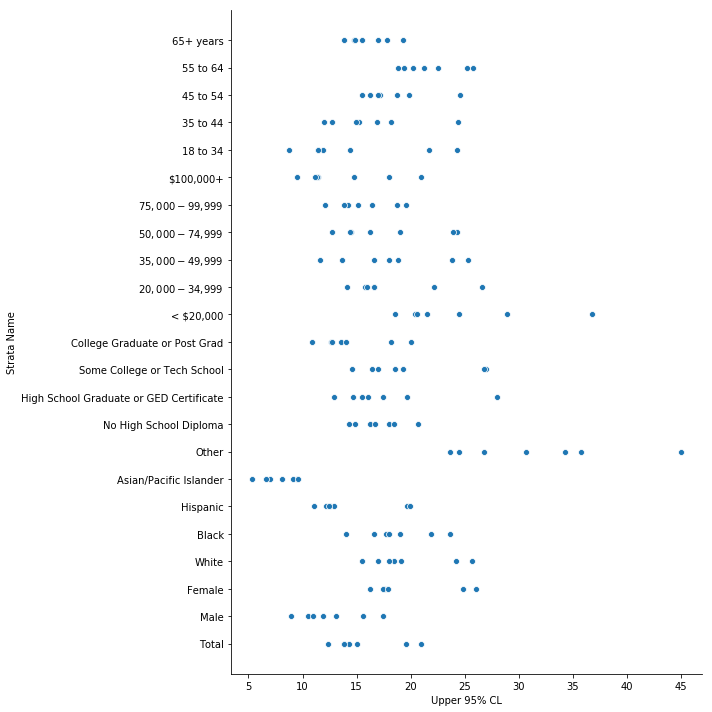

In [27]:
sns.relplot(y = "Strata Name", x = "Upper 95% CL", data = depression, height = 10)

Анализируя построенный график можно прийти к выводу, что наша гипотеза верна.

Гипотеза 4
Предположим, что женжинам чаще диагностируют депрессию вне зависимости от года.

In [28]:
depression.loc[depression['Strata Name'] == 'Female'].var()

Year                  4.666667e+00
Frequency             2.713857e+04
Weighted Frequency    2.175876e+11
Percent               1.087313e+01
Lower 95% CL          6.846457e+00
Upper 95% CL          1.603016e+01
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eabf15f10>,
      dtype=object)

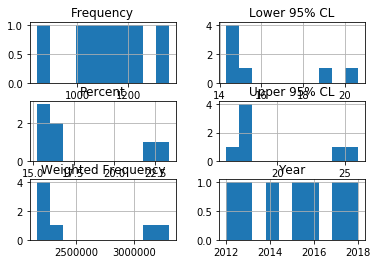

In [29]:
depression.loc[depression['Strata Name'] == 'Female'].hist()

In [30]:
depression.loc[depression['Strata Name'] == 'Male'].var()

Year                  4.666667e+00
Frequency             9.031810e+03
Weighted Frequency    9.732687e+10
Percent               5.246581e+00
Lower 95% CL          2.592362e+00
Upper 95% CL          8.868390e+00
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eabb0a910>,
      dtype=object)

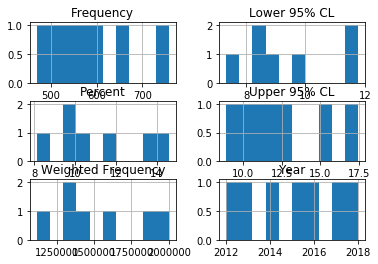

In [31]:
depression.loc[depression['Strata Name'] == 'Male'].hist()

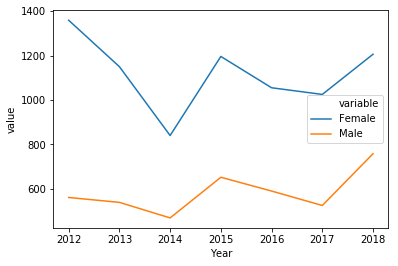

In [33]:
female_depression = depression[depression['Strata Name'] == 'Female'].groupby(['Year']).sum().Frequency
male_depression = depression[depression['Strata Name'] == 'Male'].groupby(['Year']).sum().Frequency
data_sex = pd.DataFrame({
    'Year' : depression[depression['Strata Name'] == 'Female'].Year.unique(),
    'Female' : female_depression,
    'Male' : male_depression,
    })
sns.lineplot(x = 'Year', y = 'value', hue = 'variable', data = pd.melt(data_sex, ['Year']))


Действительно, женщинам в несколько раз чаще диагностируют депрессию нежели мужчинам.

In [39]:
depression[depression['Strata Name'].isin(['Female','Male'])]['Strata Name'].value_counts()

Female    7
Male      7
Name: Strata Name, dtype: int64